In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/HEK(precursor_swap)/NRP_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.00001.00001.3,1,VEHEEM[147]PEAK/3,0.226,0.0375,[2],0,0.335,23,0.101,...,-1,0,0,(),Normal,Unk,Unk,1,Target,1738144137
1,b1906_293T_proteinID_01A_QE3_122212.00002.00002.3,1,VENDWHR/3,0.231,0.0270,[2],0,0.001,12,0.098,...,-1,0,0,(),Normal,Unk,Unk,1,Target,1740103780
2,b1906_293T_proteinID_01A_QE3_122212.00003.00003.2,1,VLLPFTR/2,0.178,0.0010,[2],0,-0.003,52,0.080,...,-1,0,0,(),Normal,Unk,Unk,1,Target,1784348664
3,b1906_293T_proteinID_01A_QE3_122212.00004.00004.2,1,TAQDANPLDSIDLSSAVFDC[160]K/2,0.124,0.0240,[2],0,0.501,14,0.051,...,-1,0,0,(),Normal,Unk,Unk,1,Target,1604258353
4,b1906_293T_proteinID_01A_QE3_122212.00007.00007.4,1,SPAKPVQTITPHGK/4,0.311,0.0550,[2],0,0.009,8,0.165,...,-1,0,0,(),Normal,Unk,Unk,1,Target,1542891329


In [3]:
NNd1 = pd.read_excel('./target_decoy/HEK(precursor_swap)/NRP_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.00006.00006.2,1,MMASLLEASFPETDEMR/2,0.118,0.016,[2],0,0.007,20,0.048,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,2257317883
1,b1906_293T_proteinID_01A_QE3_122212.00008.00008.2,1,QASNNINQTDSTSTSTLR/2,0.182,0.070,[2],0,0.492,30,0.046,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,2248560264
2,b1906_293T_proteinID_01A_QE3_122212.00010.00010.2,1,TQLDWYEPGEQEIWPAR/2,0.165,0.015,[2],0,-0.005,34,0.053,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,1968600486
3,b1906_293T_proteinID_01A_QE3_122212.00017.00017.3,1,PREDPKSNIVEWSESLSR/3,0.249,0.128,[2],0,0.342,42,0.043,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,2365457847
4,b1906_293T_proteinID_01A_QE3_122212.00022.00022.2,1,HGPADLITFHK/2,0.236,0.027,[2],0,0.006,155,0.071,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,2125162841


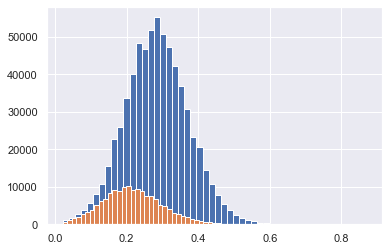

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.017000000000000005
0.01268


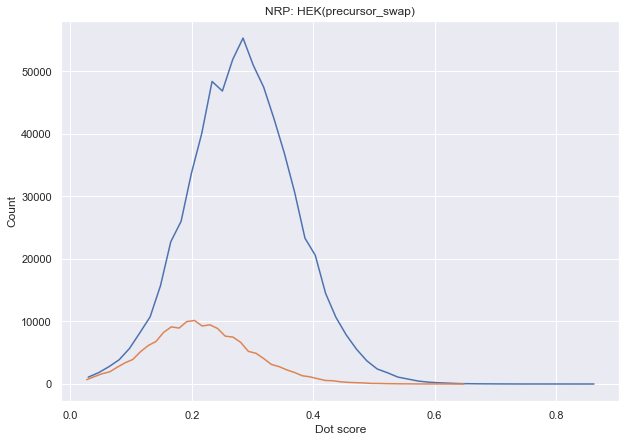

In [8]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('NRP: HEK(precursor_swap)')
plt.plot(nnt1[1][:-1] + 0.0085, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.006, nnd1[0])
plt.show()

In [6]:
print(len(NNt1))
print(len(NNd1))

676434
159387


In [7]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
"""

score:  0.001
nnt:  676434
nnd:  159387
FDR:  0.23562830963552986


score:  0.002
nnt:  676434
nnd:  159387
FDR:  0.23562830963552986


score:  0.003
nnt:  676434
nnd:  159387
FDR:  0.23562830963552986


score:  0.004
nnt:  676434
nnd:  159387
FDR:  0.23562830963552986


score:  0.005
nnt:  676434
nnd:  159387
FDR:  0.23562830963552986


score:  0.006
nnt:  676434
nnd:  159387
FDR:  0.23562830963552986


score:  0.007
nnt:  676434
nnd:  159387
FDR:  0.23562830963552986


score:  0.008
nnt:  676434
nnd:  159387
FDR:  0.23562830963552986


score:  0.009000000000000001
nnt:  676434
nnd:  159387
FDR:  0.23562830963552986


score:  0.010000000000000002
nnt:  676434
nnd:  159387
FDR:  0.23562830963552986


score:  0.011000000000000003
nnt:  676434
nnd:  159387
FDR:  0.23562830963552986


score:  0.012000000000000004
nnt:  676434
nnd:  159387
FDR:  0.23562830963552986


score:  0.013000000000000005
nnt:  676434
nnd:  159387
FDR:  0.23562830963552986


score:  0.014000000000000005
nnt:  676434

nnt:  662762
nnd:  146296
FDR:  0.22073685576421098


score:  0.10300000000000008
nnt:  662381
nnd:  145984
FDR:  0.2203927950831923


score:  0.10400000000000008
nnt:  662018
nnd:  145657
FDR:  0.2200196973496189


score:  0.10500000000000008
nnt:  661596
nnd:  145307
FDR:  0.21963101348859423


score:  0.10600000000000008
nnt:  661217
nnd:  144960
FDR:  0.21923211290695793


score:  0.10700000000000008
nnt:  660827
nnd:  144606
FDR:  0.21882580463570647


score:  0.10800000000000008
nnt:  660385
nnd:  144272
FDR:  0.2184665006019216


score:  0.10900000000000008
nnt:  659985
nnd:  143894
FDR:  0.21802616726137716


score:  0.11000000000000008
nnt:  659544
nnd:  143545
FDR:  0.21764279562849484


score:  0.11100000000000008
nnt:  659120
nnd:  143182
FDR:  0.21723206699842215


score:  0.11200000000000009
nnt:  658701
nnd:  142823
FDR:  0.21682523633636505


score:  0.11300000000000009
nnt:  658237
nnd:  142444
FDR:  0.21640229886803689


score:  0.11400000000000009
nnt:  657773
nnd:  

nnt:  552669
nnd:  85526
FDR:  0.1547508544897579


score:  0.20400000000000015
nnt:  550536
nnd:  84761
FDR:  0.15396086722757457


score:  0.20500000000000015
nnt:  548473
nnd:  83984
FDR:  0.15312330780184258


score:  0.20600000000000016
nnt:  546339
nnd:  83209
FDR:  0.1523028742227811


score:  0.20700000000000016
nnt:  544172
nnd:  82407
FDR:  0.1514355755165646


score:  0.20800000000000016
nnt:  541969
nnd:  81635
FDR:  0.15062669636086196


score:  0.20900000000000016
nnt:  539753
nnd:  80852
FDR:  0.1497944430137489


score:  0.21000000000000016
nnt:  537563
nnd:  80067
FDR:  0.1489444027955793


score:  0.21100000000000016
nnt:  535319
nnd:  79303
FDR:  0.14814157539709968


score:  0.21200000000000016
nnt:  533004
nnd:  78506
FDR:  0.1472897013906087


score:  0.21300000000000016
nnt:  530735
nnd:  77761
FDR:  0.14651568108378005


score:  0.21400000000000016
nnt:  528458
nnd:  76976
FDR:  0.14566152844691538


score:  0.21500000000000016
nnt:  526040
nnd:  76208
FDR:  0.1

nnt:  256784
nnd:  21171
FDR:  0.08244672565268864


score:  0.3090000000000002
nnt:  253880
nnd:  20786
FDR:  0.08187332598077832


score:  0.3100000000000002
nnt:  250869
nnd:  20444
FDR:  0.08149273126611897


score:  0.3110000000000002
nnt:  247962
nnd:  20089
FDR:  0.08101644606834918


score:  0.3120000000000002
nnt:  245058
nnd:  19766
FDR:  0.08065845636543185


score:  0.3130000000000002
nnt:  242203
nnd:  19443
FDR:  0.080275636552809


score:  0.3140000000000002
nnt:  239324
nnd:  19102
FDR:  0.07981648309404824


score:  0.3150000000000002
nnt:  236521
nnd:  18774
FDR:  0.07937561569585787


score:  0.3160000000000002
nnt:  233669
nnd:  18433
FDR:  0.0788850895925433


score:  0.3170000000000002
nnt:  230877
nnd:  18136
FDR:  0.07855264924613539


score:  0.3180000000000002
nnt:  228046
nnd:  17808
FDR:  0.07808950825710602


score:  0.31900000000000023
nnt:  225352
nnd:  17464
FDR:  0.07749653874826938


score:  0.32000000000000023
nnt:  222546
nnd:  17148
FDR:  0.07705373

score:  0.4150000000000003
nnt:  46721
nnd:  2360
FDR:  0.050512617452537406


score:  0.4160000000000003
nnt:  45776
nnd:  2292
FDR:  0.05006990562740301


score:  0.4170000000000003
nnt:  44874
nnd:  2246
FDR:  0.050051254624058475


score:  0.4180000000000003
nnt:  43958
nnd:  2198
FDR:  0.050002274898767005


score:  0.4190000000000003
nnt:  43068
nnd:  2154
FDR:  0.050013931457230425


score:  0.4200000000000003
nnt:  42199
nnd:  2098
FDR:  0.049716817934074266


score:  0.4210000000000003
nnt:  41339
nnd:  2053
FDR:  0.04966254626381867


score:  0.4220000000000003
nnt:  40517
nnd:  2008
FDR:  0.049559444183922795


score:  0.4230000000000003
nnt:  39698
nnd:  1962
FDR:  0.0494231447428082


score:  0.4240000000000003
nnt:  38913
nnd:  1921
FDR:  0.049366535605067714


score:  0.4250000000000003
nnt:  38142
nnd:  1885
FDR:  0.04942058623040218


score:  0.4260000000000003
nnt:  37330
nnd:  1841
FDR:  0.04931690329493705


score:  0.4270000000000003
nnt:  36589
nnd:  1799
FDR:  0.

nnt:  2527
nnd:  68
FDR:  0.026909378709932725


score:  0.5400000000000004
nnt:  2478
nnd:  67
FDR:  0.027037933817594836


score:  0.5410000000000004
nnt:  2410
nnd:  63
FDR:  0.026141078838174275


score:  0.5420000000000004
nnt:  2337
nnd:  61
FDR:  0.02610183996576808


score:  0.5430000000000004
nnt:  2268
nnd:  59
FDR:  0.02601410934744268


score:  0.5440000000000004
nnt:  2217
nnd:  57
FDR:  0.02571041948579161


score:  0.5450000000000004
nnt:  2155
nnd:  57
FDR:  0.026450116009280742


score:  0.5460000000000004
nnt:  2099
nnd:  49
FDR:  0.023344449737970462


score:  0.5470000000000004
nnt:  2045
nnd:  49
FDR:  0.023960880195599023


score:  0.5480000000000004
nnt:  1998
nnd:  49
FDR:  0.024524524524524523


score:  0.5490000000000004
nnt:  1949
nnd:  49
FDR:  0.025141097998973832


score:  0.5500000000000004
nnt:  1906
nnd:  47
FDR:  0.02465897166841553


score:  0.5510000000000004
nnt:  1856
nnd:  46
FDR:  0.02478448275862069


score:  0.5520000000000004
nnt:  1796
nnd:  

'\n결과\nscore:  0.4980000000000004\nnnt:  277943\nnnd:  2773\nFDR:  0.009976865760245805\n'